**1: Install and Import Libraries**

In [1]:

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

** 2: Download and Load Data**

In [2]:
# Download the data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz

# Define column names
col_names = [
    'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points'
] + [f'Wilderness_Area_{i}' for i in range(1, 5)] + \
            [f'Soil_Type_{i}' for i in range(1, 41)] + ['Cover_Type']

# Load the data
df = pd.read_csv('covtype.data.gz', header=None, names=col_names)

--2025-09-19 19:18:59--  https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘covtype.data.gz’

covtype.data.gz         [             <=>    ]  10.72M  3.97MB/s    in 2.7s    

2025-09-19 19:19:02 (3.97 MB/s) - ‘covtype.data.gz’ saved [11240707]



**3: Data Exploration and Preprocessing**

In [3]:
# Data exploration
print("Missing values in each column:")
print(df.isnull().sum().sum())

print("\nData types of each column:")
df.info()

# Separate features and target variable
X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']

# Identify numerical features for normalization
numerical_features = [
    'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points'
]

# Normalize numerical features
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

Missing values in each column:
0

Data types of each column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area_1                   581012 non-null  in

**4: Exploratory Data Analysis (EDA)**

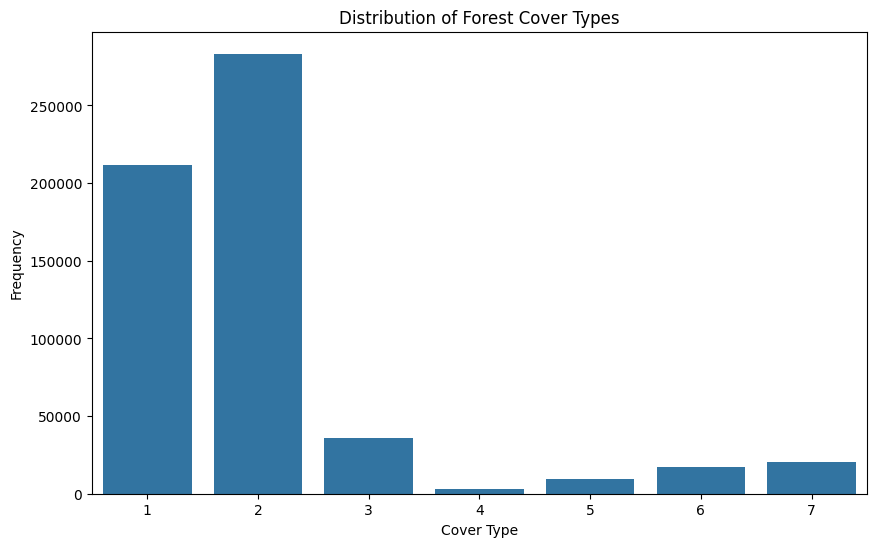

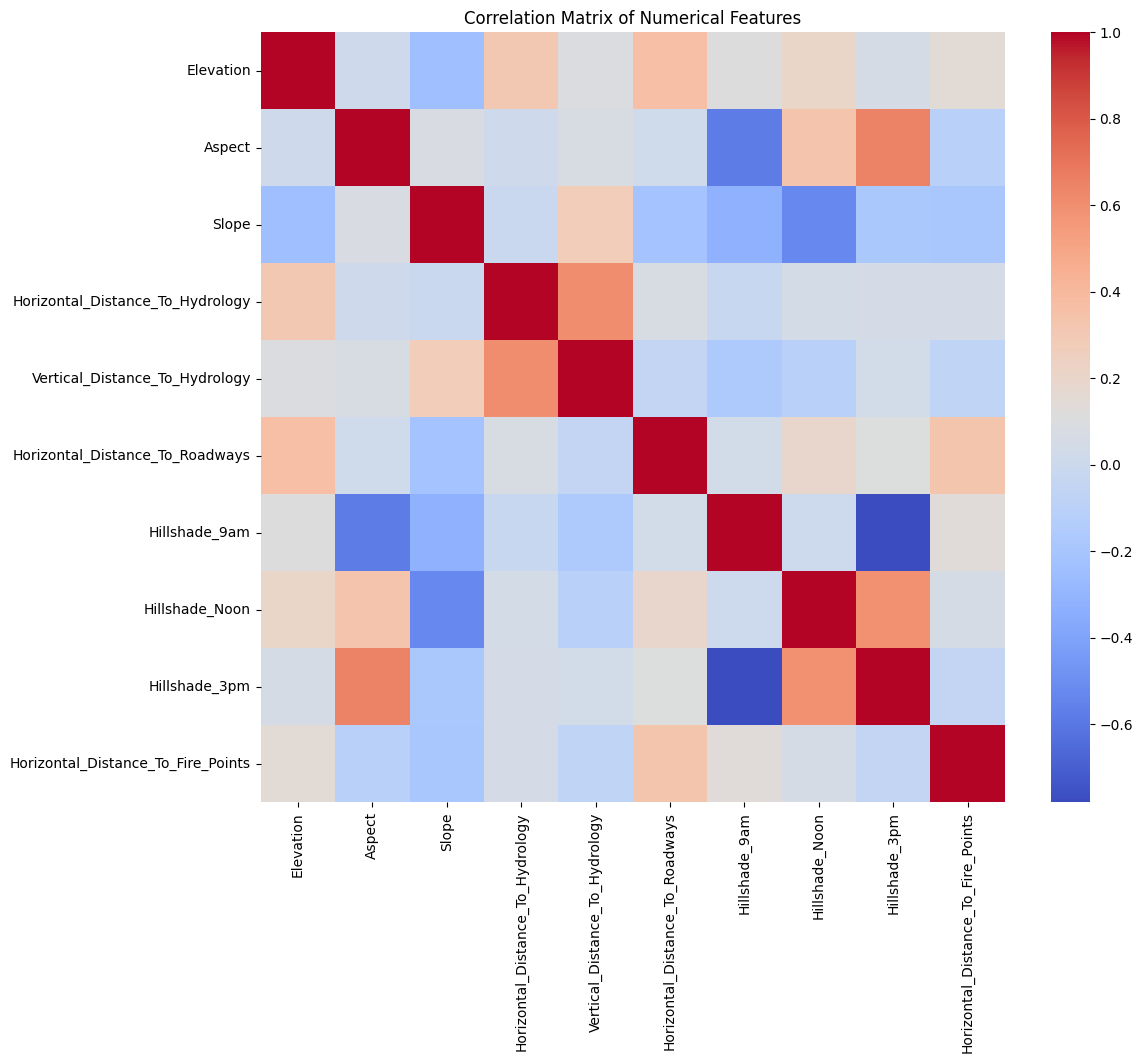

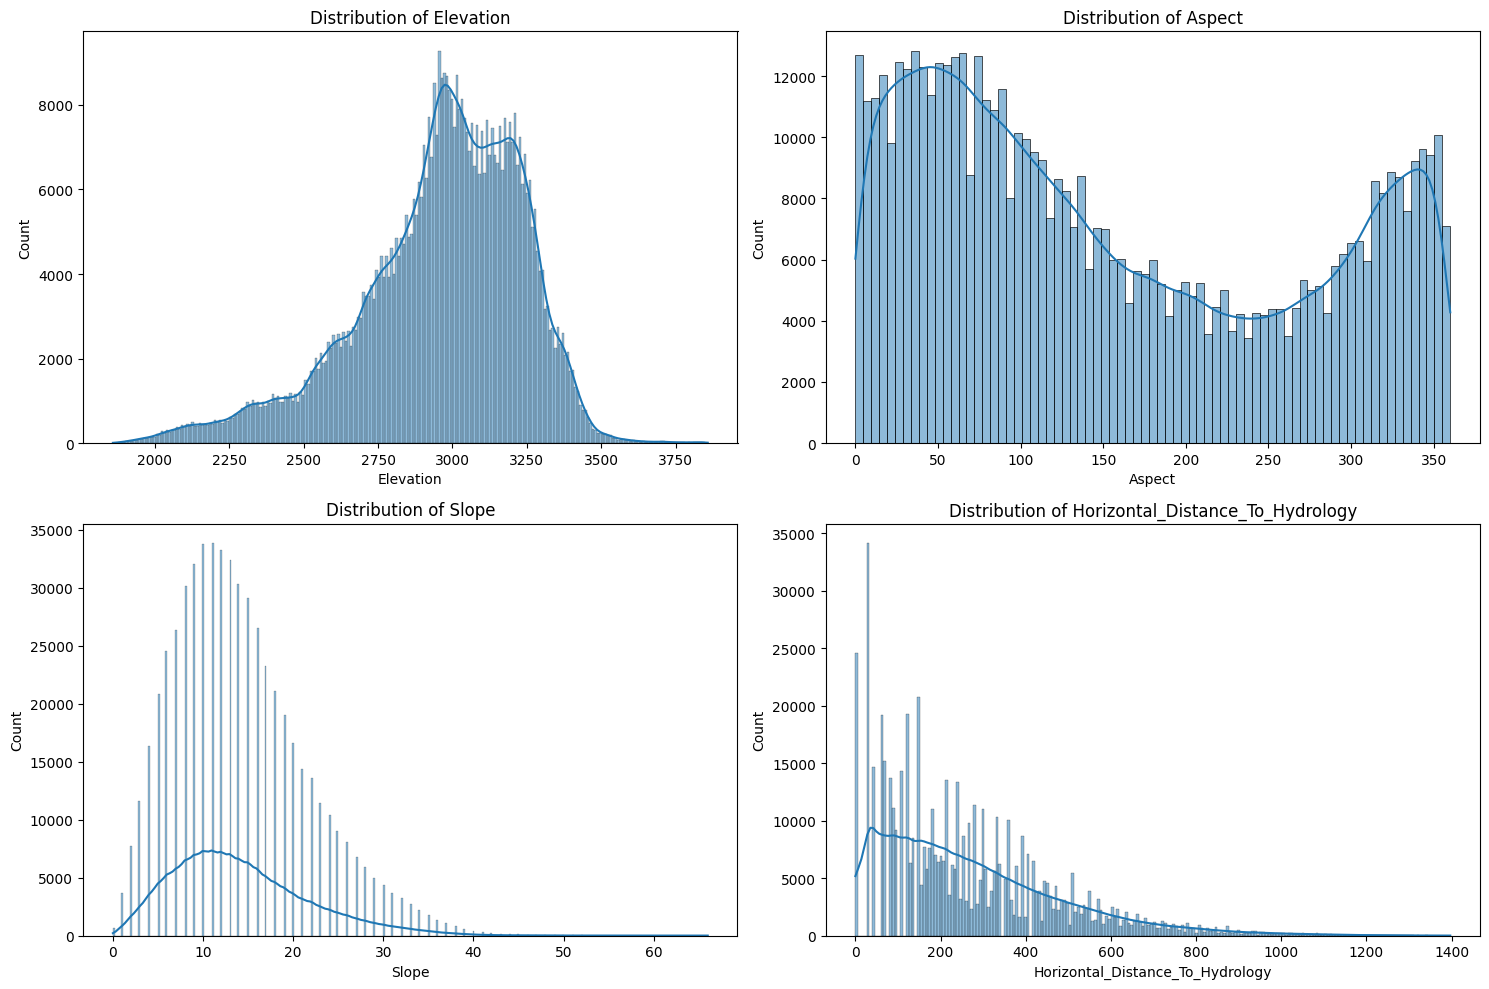

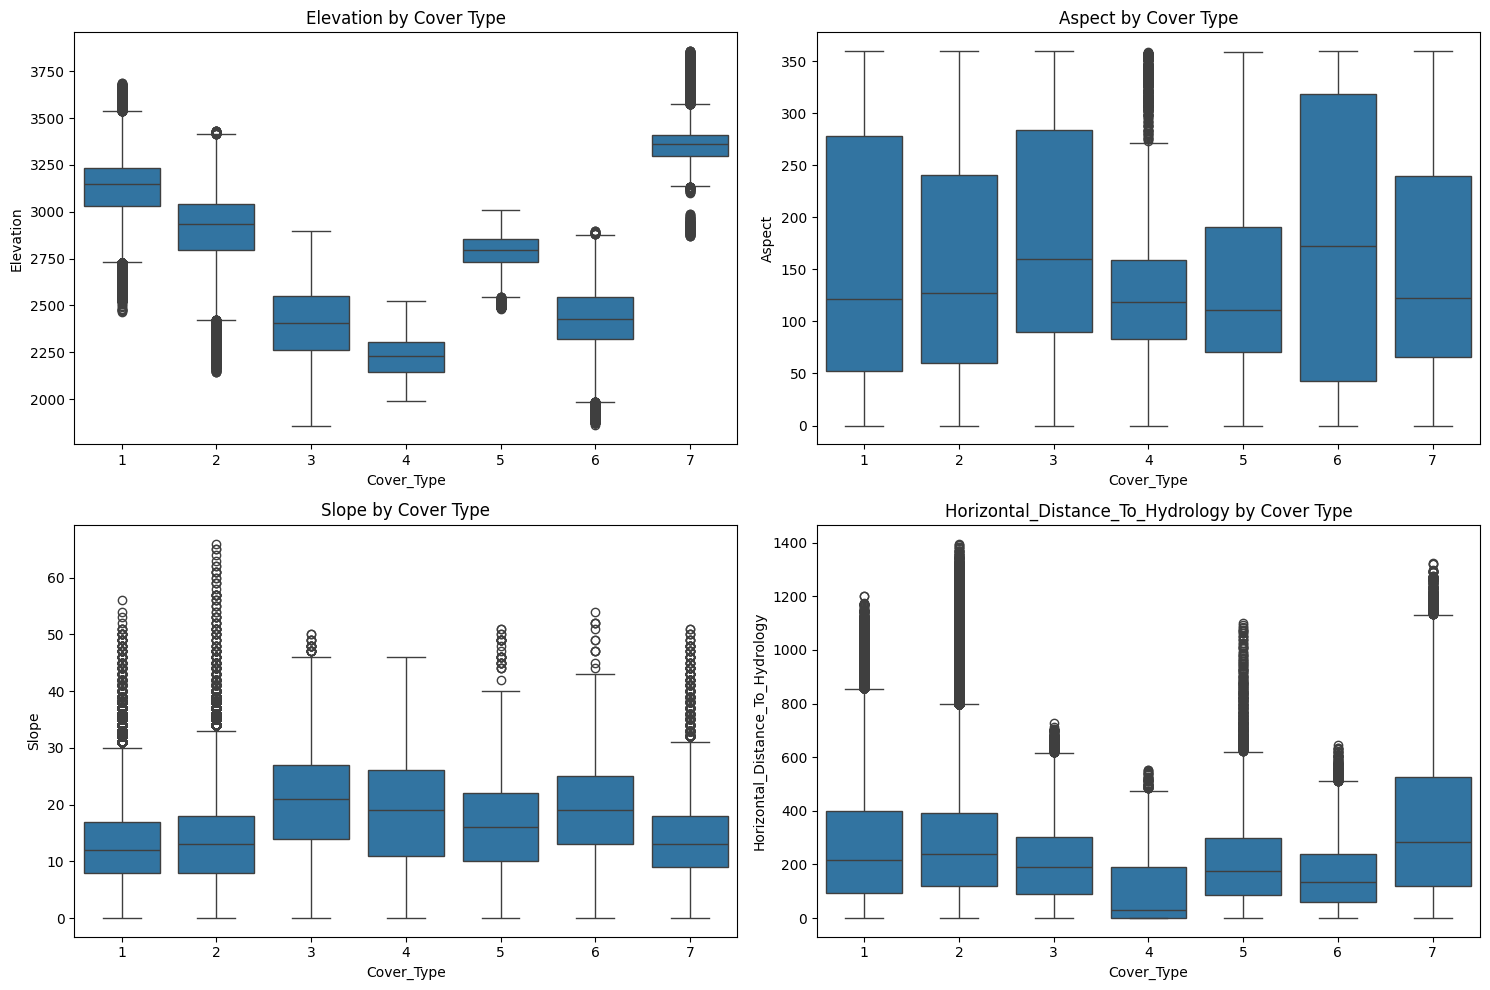

In [4]:
# Class distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Cover_Type', data=df)
plt.title('Distribution of Forest Cover Types')
plt.xlabel('Cover Type')
plt.ylabel('Frequency')
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Visualization of key features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features[:4]):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features[:4]):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='Cover_Type', y=feature, data=df)
    plt.title(f'{feature} by Cover Type')
plt.tight_layout()
plt.show()

**5: Data Splitting and Evaluation Function**

In [5]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # Confusion matrix
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

**6: Baseline Models**

Logistic Regression Model:
Accuracy: 0.7235
Precision: 0.7107
Recall: 0.7235
F1-Score: 0.7139


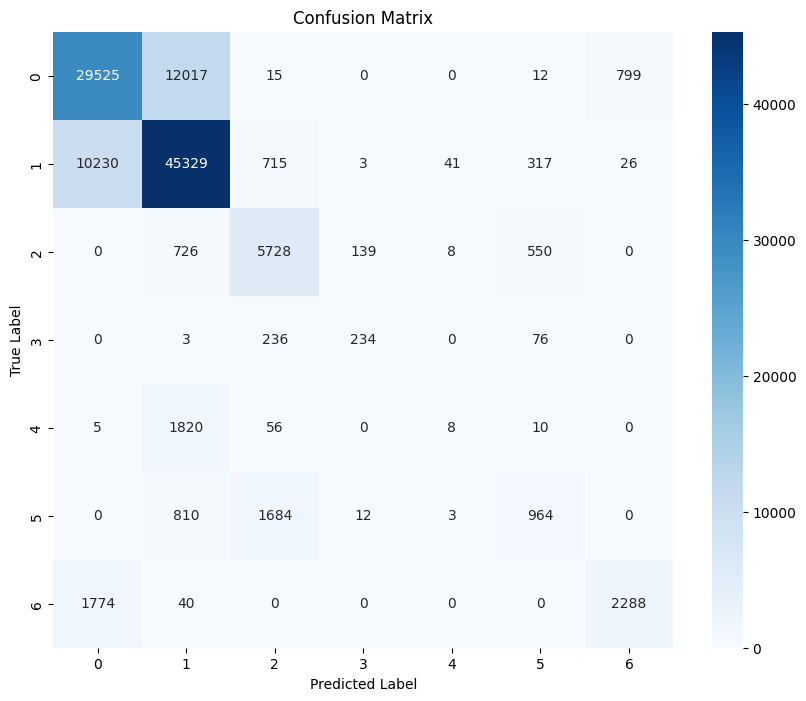


Classification Report:
              precision    recall  f1-score   support

           1       0.71      0.70      0.70     42368
           2       0.75      0.80      0.77     56661
           3       0.68      0.80      0.74      7151
           4       0.60      0.43      0.50       549
           5       0.13      0.00      0.01      1899
           6       0.50      0.28      0.36      3473
           7       0.73      0.56      0.63      4102

    accuracy                           0.72    116203
   macro avg       0.59      0.51      0.53    116203
weighted avg       0.71      0.72      0.71    116203


Random Forest Model:
Accuracy: 0.9532
Precision: 0.9534
Recall: 0.9532
F1-Score: 0.9530


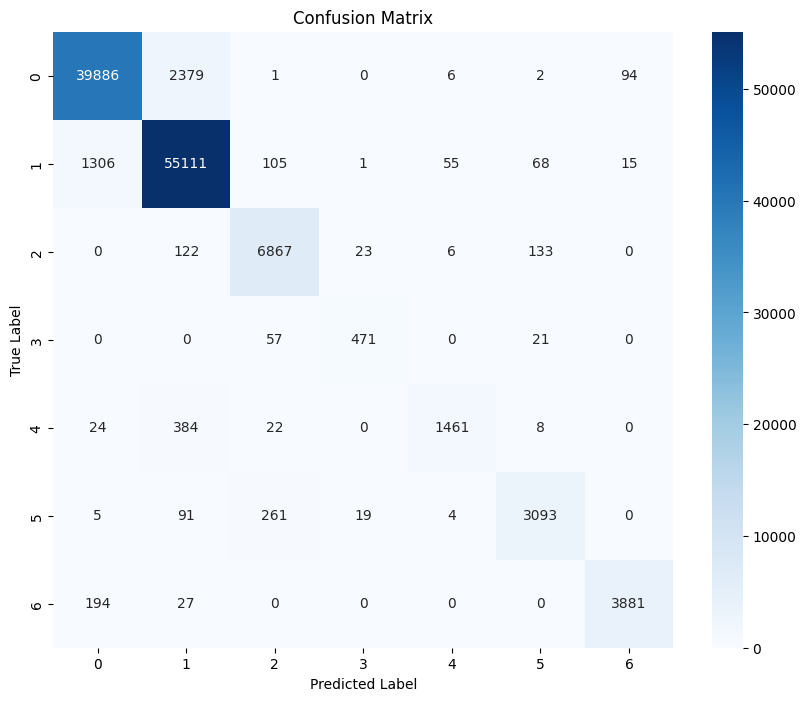


Classification Report:
              precision    recall  f1-score   support

           1       0.96      0.94      0.95     42368
           2       0.95      0.97      0.96     56661
           3       0.94      0.96      0.95      7151
           4       0.92      0.86      0.89       549
           5       0.95      0.77      0.85      1899
           6       0.93      0.89      0.91      3473
           7       0.97      0.95      0.96      4102

    accuracy                           0.95    116203
   macro avg       0.95      0.91      0.92    116203
weighted avg       0.95      0.95      0.95    116203



In [6]:
# 1. Logistic Regression Model (baseline)
print("Logistic Regression Model:")
lr_model = LogisticRegression(random_state=42, max_iter=1000, n_jobs=-1)
lr_model.fit(X_train, y_train)
evaluate_model(lr_model, X_test, y_test)

# 2. Random Forest Model
print("\nRandom Forest Model:")
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
evaluate_model(rf_model, X_test, y_test)

**7: XGBoost Model**


XGBoost Model:
Accuracy: 0.8696
Precision: 0.8697
Recall: 0.8696
F1-Score: 0.8690


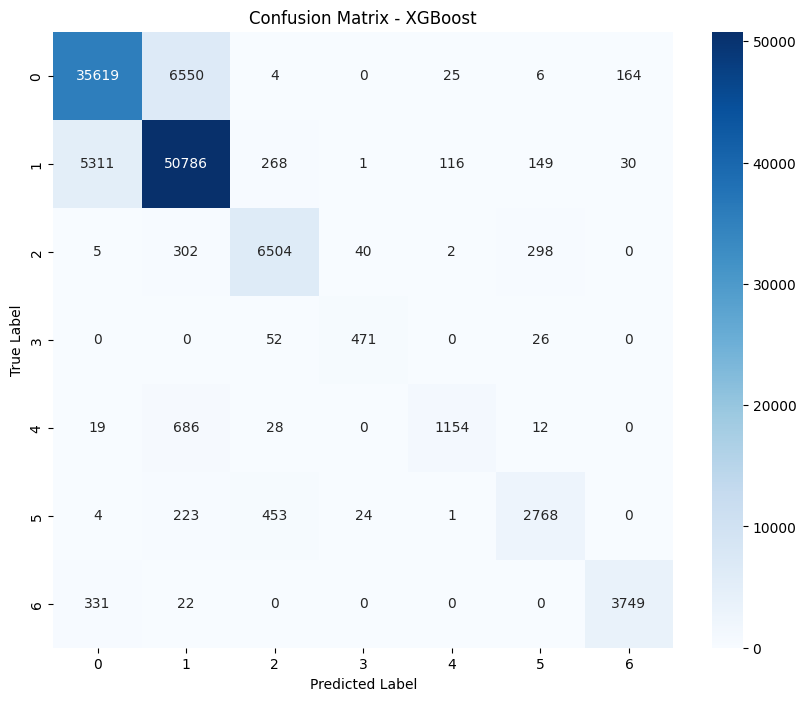


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85     42368
           1       0.87      0.90      0.88     56661
           2       0.89      0.91      0.90      7151
           3       0.88      0.86      0.87       549
           4       0.89      0.61      0.72      1899
           5       0.85      0.80      0.82      3473
           6       0.95      0.91      0.93      4102

    accuracy                           0.87    116203
   macro avg       0.88      0.83      0.85    116203
weighted avg       0.87      0.87      0.87    116203



In [7]:
# 3. XGBoost Model - ERROR FIX
print("\nXGBoost Model:")
# XGBoost expects classes to start from 0, so we adjust the labels
y_train_xgb = y_train - 1
y_test_xgb = y_test - 1

xgb_model = XGBClassifier(random_state=42, n_jobs=-1, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train_xgb)

# For evaluation, use adjusted data
y_pred_xgb = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test_xgb, y_pred_xgb)
precision = precision_score(y_test_xgb, y_pred_xgb, average='weighted')
recall = recall_score(y_test_xgb, y_pred_xgb, average='weighted')
f1 = f1_score(y_test_xgb, y_pred_xgb, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test_xgb, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - XGBoost')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test_xgb, y_pred_xgb))

** 8: Hyperparameter Tuning**


Hyperparameter Tuning for Random Forest:
Best parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Best cross-validation score: 0.9468
Accuracy: 0.9541
Precision: 0.9543
Recall: 0.9541
F1-Score: 0.9539


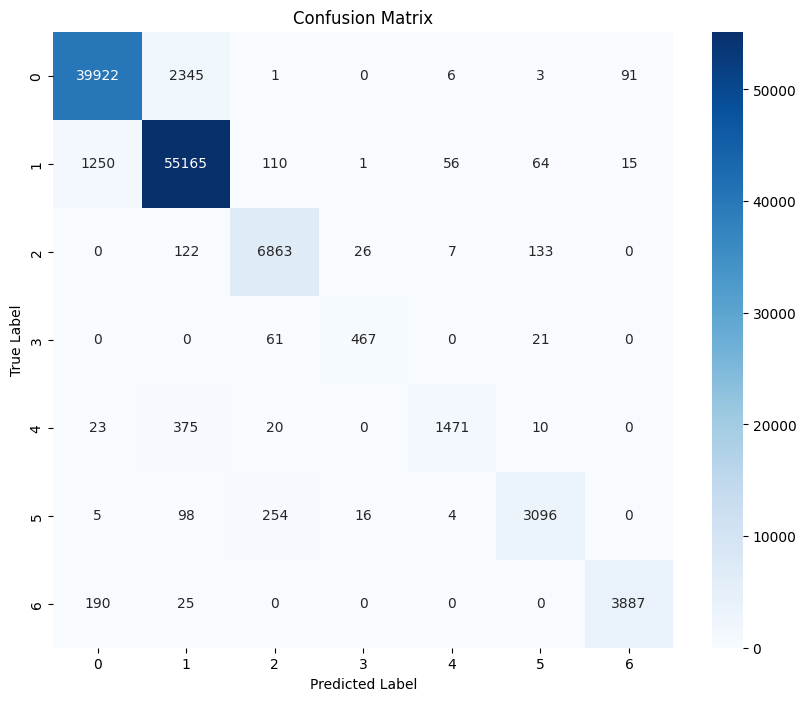


Classification Report:
              precision    recall  f1-score   support

           1       0.96      0.94      0.95     42368
           2       0.95      0.97      0.96     56661
           3       0.94      0.96      0.95      7151
           4       0.92      0.85      0.88       549
           5       0.95      0.77      0.85      1899
           6       0.93      0.89      0.91      3473
           7       0.97      0.95      0.96      4102

    accuracy                           0.95    116203
   macro avg       0.95      0.91      0.92    116203
weighted avg       0.95      0.95      0.95    116203


Hyperparameter Tuning for XGBoost:
Best parameters: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 9, 'learning_rate': 0.2, 'colsample_bytree': 0.8}
Best cross-validation score: 0.9466
Accuracy: 0.9505
Precision: 0.9506
Recall: 0.9505
F1-Score: 0.9504


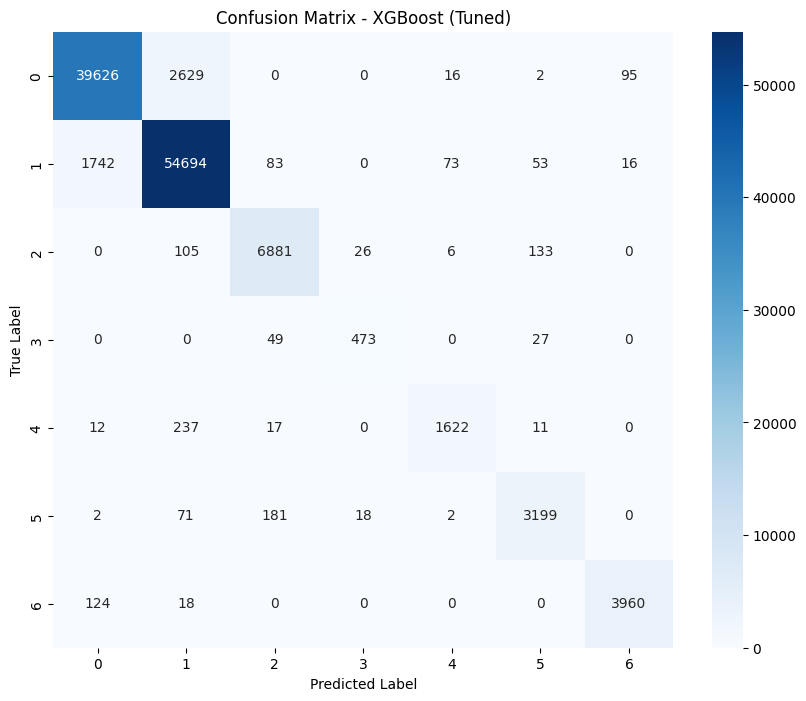


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     42368
           1       0.95      0.97      0.96     56661
           2       0.95      0.96      0.96      7151
           3       0.91      0.86      0.89       549
           4       0.94      0.85      0.90      1899
           5       0.93      0.92      0.93      3473
           6       0.97      0.97      0.97      4102

    accuracy                           0.95    116203
   macro avg       0.95      0.92      0.93    116203
weighted avg       0.95      0.95      0.95    116203



In [8]:
# Hyperparameter Tuning for Random Forest
print("\nHyperparameter Tuning for Random Forest:")
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_grid = RandomizedSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    param_grid_rf,
    n_iter=10,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

rf_grid.fit(X_train, y_train)
print(f"Best parameters: {rf_grid.best_params_}")
print(f"Best cross-validation score: {rf_grid.best_score_:.4f}")

best_rf_model = rf_grid.best_estimator_
evaluate_model(best_rf_model, X_test, y_test)

# Hyperparameter Tuning for XGBoost
print("\nHyperparameter Tuning for XGBoost:")
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_grid = RandomizedSearchCV(
    XGBClassifier(random_state=42, n_jobs=-1, eval_metric='mlogloss'),
    param_grid_xgb,
    n_iter=10,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

# Use adjusted labels for XGBoost
xgb_grid.fit(X_train, y_train_xgb)
print(f"Best parameters: {xgb_grid.best_params_}")
print(f"Best cross-validation score: {xgb_grid.best_score_:.4f}")

best_xgb_model = xgb_grid.best_estimator_

# Evaluation of optimized XGBoost model
y_pred_xgb_tuned = best_xgb_model.predict(X_test)
accuracy = accuracy_score(y_test_xgb, y_pred_xgb_tuned)
precision = precision_score(y_test_xgb, y_pred_xgb_tuned, average='weighted')
recall = recall_score(y_test_xgb, y_pred_xgb_tuned, average='weighted')
f1 = f1_score(y_test_xgb, y_pred_xgb_tuned, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test_xgb, y_pred_xgb_tuned)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - XGBoost (Tuned)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test_xgb, y_pred_xgb_tuned))

**9: Model Comparison and Visualization**


Model Comparison:
                   Model  Accuracy  Precision    Recall  F1-Score
0    Logistic Regression  0.723527   0.710745  0.723527  0.713906
1          Random Forest  0.953246   0.953387  0.953246  0.953004
2  Random Forest (Tuned)  0.954115   0.954259  0.954115  0.953881
3                XGBoost  0.869607   0.869732  0.869607  0.869023
4        XGBoost (Tuned)  0.950535   0.950575  0.950535  0.950433


<Figure size 1200x800 with 0 Axes>

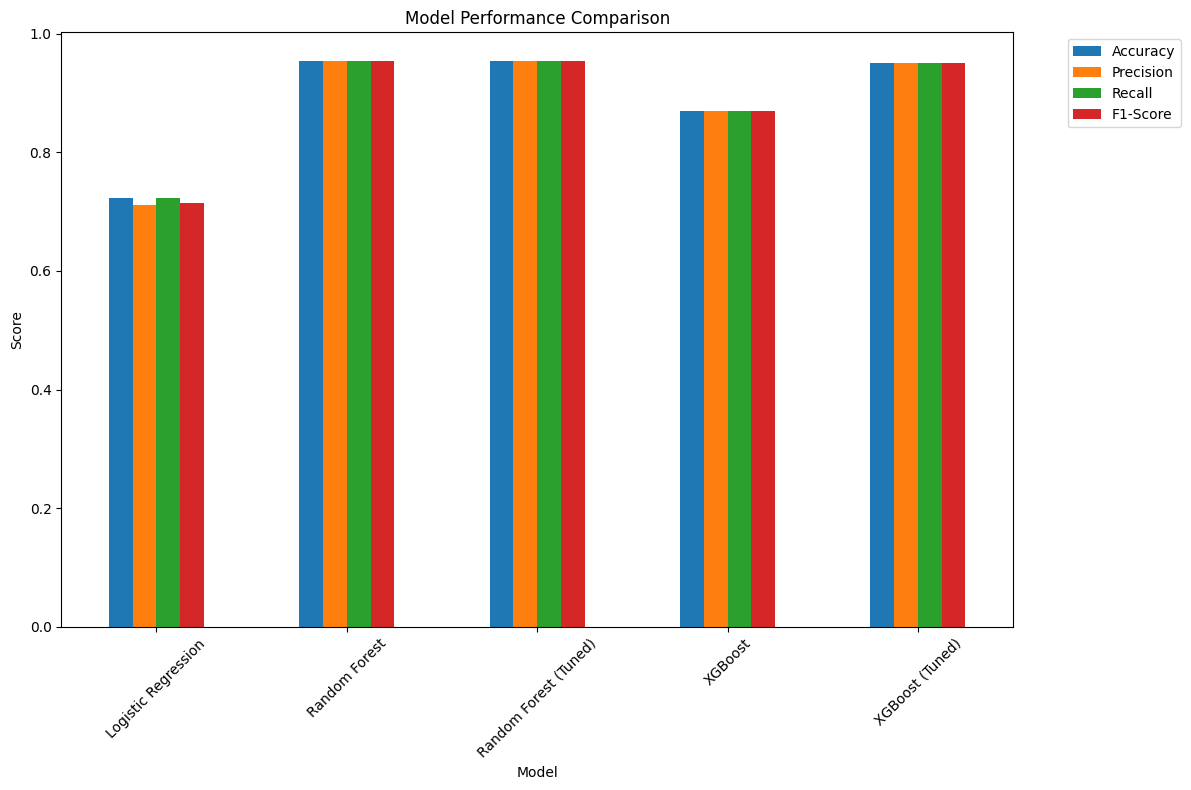

In [9]:
# Model performance comparison
models = {
    'Logistic Regression': lr_model,
    'Random Forest': rf_model,
    'Random Forest (Tuned)': best_rf_model,
    'XGBoost': xgb_model,
    'XGBoost (Tuned)': best_xgb_model
}

results = []
for name, model in models.items():
    if 'XGBoost' in name:
        # For XGBoost, use adjusted labels
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test_xgb, y_pred)
        precision = precision_score(y_test_xgb, y_pred, average='weighted')
        recall = recall_score(y_test_xgb, y_pred, average='weighted')
        f1 = f1_score(y_test_xgb, y_pred, average='weighted')
    else:
        # For other models, use original labels
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

results_df = pd.DataFrame(results)
print("\nModel Comparison:")
print(results_df)

# Visualization of model performance
plt.figure(figsize=(12, 8))
results_df.set_index('Model').plot(kind='bar', figsize=(12, 8))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**10: Feature Importance**

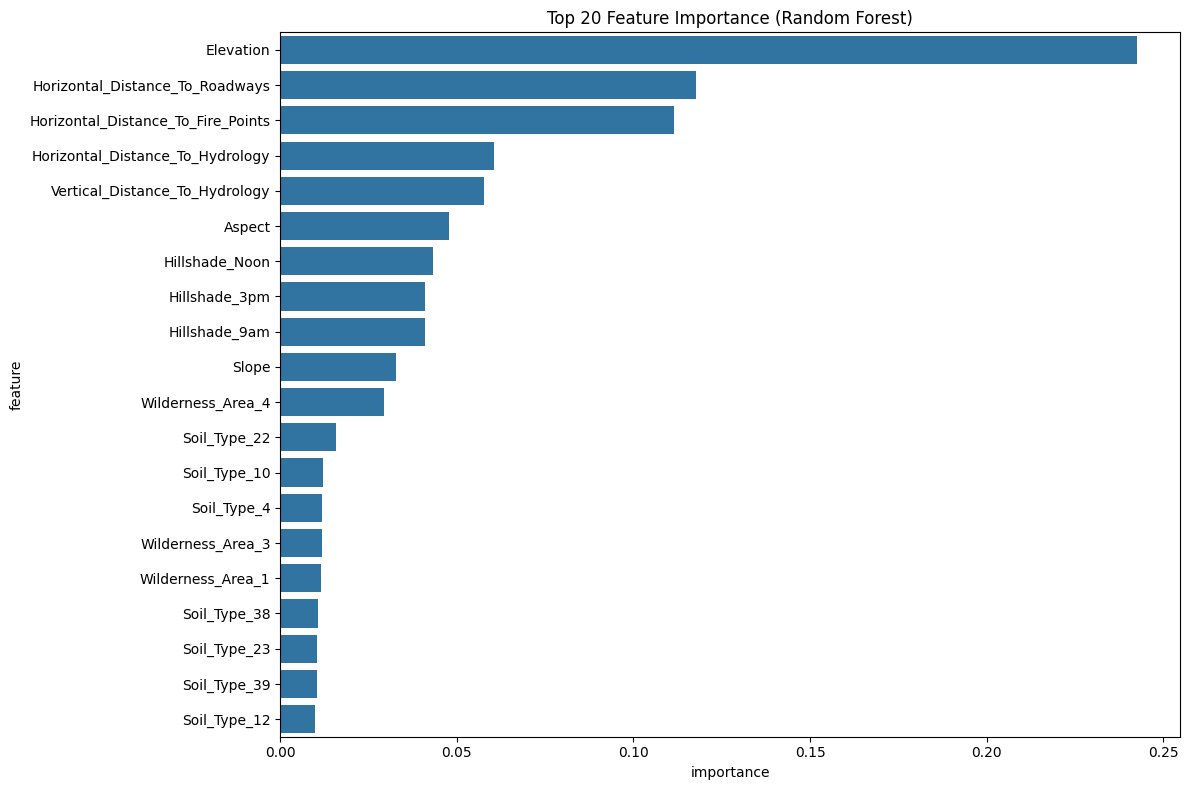

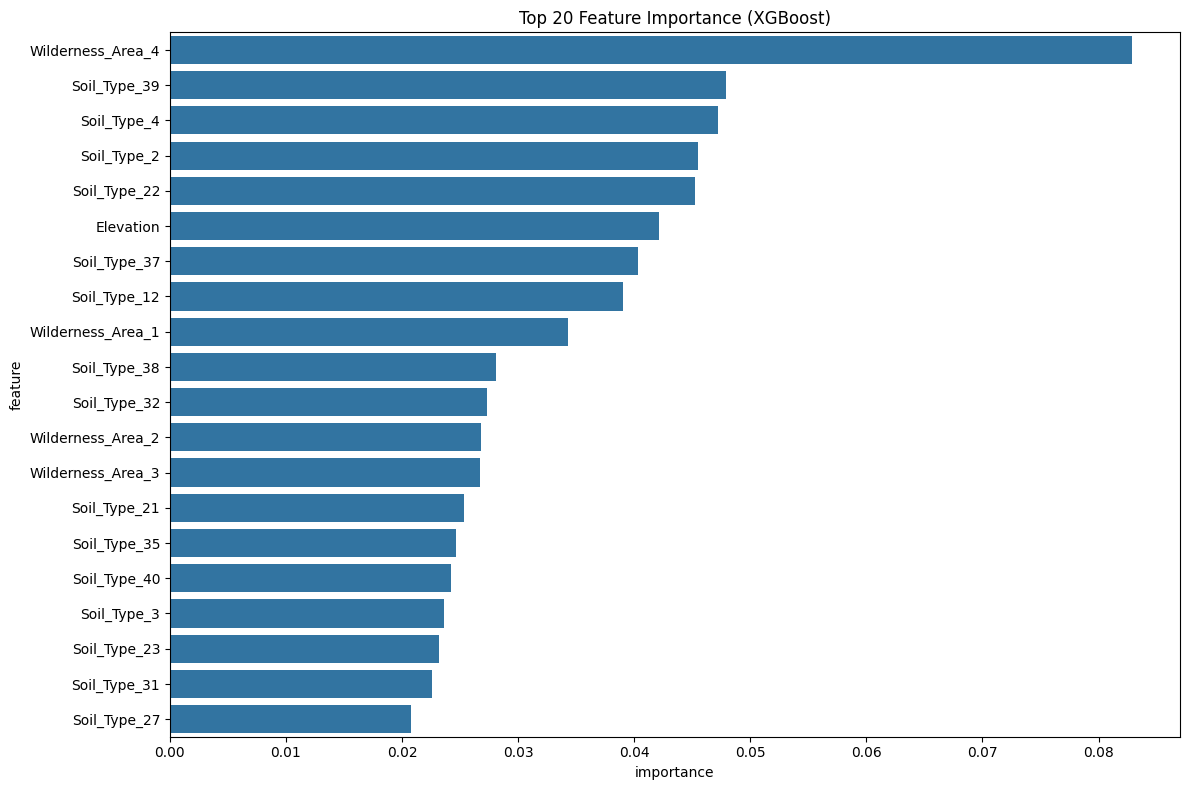

In [10]:
# Feature Importance for the best Random Forest model
plt.figure(figsize=(12, 8))
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_rf_model.feature_importances_
}).sort_values('importance', ascending=False).head(20)

sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Top 20 Feature Importance (Random Forest)')
plt.tight_layout()
plt.show()

# Feature Importance for the best XGBoost model
plt.figure(figsize=(12, 8))
feature_importance_xgb = pd.DataFrame({
    'feature': X.columns,
    'importance': best_xgb_model.feature_importances_
}).sort_values('importance', ascending=False).head(20)

sns.barplot(x='importance', y='feature', data=feature_importance_xgb)
plt.title('Top 20 Feature Importance (XGBoost)')
plt.tight_layout()
plt.show()

**11: Save the Best Model**

In [11]:
# Save the best model
import joblib
joblib.dump(best_rf_model, 'best_forest_cover_model.pkl')

print("\nBest model saved as 'best_forest_cover_model.pkl'")


Best model saved as 'best_forest_cover_model.pkl'
